# Notebook 02: Regression Model

**Student Name:** [Francisco Molina]

**Dataset:** [Workation Price Prediction Challenge-MachineHack]

**Target Variable:** [Per Person Price]

**Checkpoint 3 Due:** Feb 15

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before the checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll be asked to interpret results, justify decisions, and explain your reasoning. **These written reflections are a critical part of your grade.**

Good data scientists don't just run code—they communicate their findings clearly. Take time to write thoughtful, complete responses to all reflection prompts. This demonstrates your understanding and prepares you for real-world stakeholder communication.

---

## Setup

In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Sklearn - models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Sklearn - evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model saving
import joblib

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In this step, I am importing the necessary libraries for data manipulation, visualization, and machine learning.

## Section 1: Load Processed Data

In [3]:
# Load cleaned data from previous notebook
df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data shape: {df.shape}")
df.head()

Data shape: (20997, 19)


,Destination,Airline,Flight Stops,Per Person Price,Journey_Month,Num_Places_Visited,Package Type_Deluxe,Package Type_Luxury,Package Type_Premium,Package Type_Standard,Start City_New Delhi,Journey_Day_Monday,Journey_Day_Saturday,Journey_Day_Sunday,Journey_Day_Thursday,Journey_Day_Tuesday,Journey_Day_Wednesday,Is_Peak_Season,Trip_Complexity
0,417,290,2,11509.0,5,4,False,False,False,True,False,False,False,False,False,False,False,1,12
1,533,125,0,22485.5,2,3,False,False,True,False,True,False,False,False,False,False,True,1,3
2,549,114,0,12421.5,0,2,False,True,False,False,True,True,False,False,False,False,False,0,2
3,329,114,0,35967.0,1,4,False,False,True,False,True,False,False,False,False,False,False,0,4
4,443,237,0,25584.0,2,2,False,False,True,False,True,False,False,True,False,False,False,1,2


I load the preprocessed dataset `cleaned_data.csv` created in the previous notebook.

In [4]:
# Define your target variable
TARGET = 'Per Person Price'  # <-- UPDATE THIS!

print(f"Target: {TARGET}")
print(f"\nTarget statistics:")
print(df[TARGET].describe())

# Store target range for later interpretation
target_range = df[TARGET].max() - df[TARGET].min()
target_std = df[TARGET].std()
print(f"\nTarget range: {target_range:,.2f}")
print(f"Target std: {target_std:,.2f}")

Target: Per Person Price

Target statistics:
count     20997.000000
mean      20060.869291
std       11643.749767
min         791.000000
25%       12464.500000
50%       17766.000000
75%       25084.000000
max      171062.500000
Name: Per Person Price, dtype: float64

Target range: 170,271.50
Target std: 11,643.75


Target Variable Analysis
I have defined 'Per Person Price' as my target variable for the regression model.

Mean Price: The average cost is approximately 20,060.

Spread: The data is highly spread out, with a Standard Deviation of 11,643. This means prices vary significantly.

Range: There is a big gap between the minimum price (791) and the maximum (171,062).

*Potential outliers.

## Section 2: Prepare Features and Target

In [5]:
# Separate features (X) and target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nAll features ({len(X.columns)}):")
print(X.columns.tolist())

Features shape: (20997, 18)
Target shape: (20997,)

All features (18):
['Destination', 'Airline', 'Flight Stops', 'Journey_Month', 'Num_Places_Visited', 'Package Type_Deluxe', 'Package Type_Luxury', 'Package Type_Premium', 'Package Type_Standard', 'Start City_New Delhi', 'Journey_Day_Monday', 'Journey_Day_Saturday', 'Journey_Day_Sunday', 'Journey_Day_Thursday', 'Journey_Day_Tuesday', 'Journey_Day_Wednesday', 'Is_Peak_Season', 'Trip_Complexity']


I have separated the dataset into the Feature Matrix (X) and the Target Vector (Y).


In [6]:
# Check for any non-numeric columns that need to be handled
non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    print(f"Warning: Non-numeric columns found: {non_numeric}")
    print("You need to encode these or go back to Notebook 01!")
else:
    print("All features are numeric. Ready to proceed!")

All features are numeric. Ready to proceed!


## Section 3: Train-Test Split

Split your data into training and test sets. The training set is used to train the model, and the test set is used to evaluate how well it generalizes to unseen data.

In [7]:
# TODO: Split your data into training and test sets
# 
# Requirements:
# - Use an 80/20 split (test_size=0.2)
# - Set random_state=42 for reproducibility
# - Store results in: X_train, X_test, y_train, y_test
#
# Hint: Use train_test_split(X, y, ...)

# YOUR CODE HERE:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split datasets to ensure everything looks right
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

Training set shape (X_train): (16797, 18)
Testing set shape (X_test): (4200, 18)
Training target shape (y_train): (16797,)
Testing target shape (y_test): (4200,)


In [8]:
# Verify your split (run this cell to check)
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

Training set: 16,797 samples (80%)
Test set: 4,200 samples (20%)


Train-Test Split Verification

I have verified the dimensions of the training and testing sets.
The data split was successful and follows the standard 80/20 ratio.

## Section 4: Feature Scaling

Many ML algorithms perform better when features are on similar scales. StandardScaler transforms features to have mean=0 and std=1.

**Important:** Fit the scaler on training data only, then transform both train and test. This prevents data leakage.

In [9]:
# TODO: Scale your features using StandardScaler
#
# Steps:
# 1. Create a StandardScaler instance
# 2. Fit the scaler on X_train and transform X_train (use fit_transform)
# 3. Transform X_test using the same scaler (use transform only - NOT fit_transform!)
# 4. Store results in: X_train_scaled, X_test_scaled
#
# Why fit only on train? To prevent "data leakage" - test data should be truly unseen.

# YOUR CODE HERE:


# 1. Create a StandardScaler instance
scaler = StandardScaler()

# 2. Fit the scaler on X_train and transform X_train

X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform X_test using the same scaler

X_test_scaled = scaler.transform(X_test)


In [10]:
# Convert back to DataFrame for easier viewing (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify scaling worked
print("Features scaled successfully!")
print(f"\nScaled feature means (should be ~0): {X_train_scaled.mean().mean():.4f}")
print(f"Scaled feature stds (should be ~1): {X_train_scaled.std().mean():.4f}")

Features scaled successfully!

Scaled feature means (should be ~0): 0.0000
Scaled feature stds (should be ~1): 1.0000


Feature Scaling Verification

I have verified the results of the Standard Scaling:

* Training Set: Mean is 0.00 and Std is 1.00. This confirms the scaler was fitted correctly.

The data is now scaled and ready for the Linear Regression model.

## Section 5: Baseline Model

Start with a simple Linear Regression to establish a baseline performance. This gives us a reference point for improvement.

In [11]:
# This helper function evaluates any model - you'll use it throughout this notebook
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train model and return evaluation metrics."""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return results, model, y_test_pred

In [12]:
# TODO: Create and evaluate a baseline Linear Regression model
#
# Steps:
# 1. Create a LinearRegression() model instance
# 2. Use the evaluate_model() function to train and evaluate it
# 3. Store the results
#
# The evaluate_model function returns: (results_dict, trained_model, predictions)

# YOUR CODE HERE:
# baseline_model = ...
# baseline_results, baseline_trained, baseline_preds = evaluate_model(...)

# 1. Create a LinearRegression() model instance

baseline_model = LinearRegression()

# 2. Use the evaluate_model() function to train and evaluate it

baseline_results, baseline_trained, baseline_preds = evaluate_model( baseline_model, X_train_scaled, X_test_scaled, y_train, y_test, 
    "Linear Regression (Baseline)"
)




In [13]:
# Display baseline results
print("=" * 50)
print("BASELINE MODEL: Linear Regression")
print("=" * 50)
print(f"Train R²: {baseline_results['Train R2']:.4f}")
print(f"Test R²:  {baseline_results['Test R2']:.4f}")
print(f"Test RMSE: {baseline_results['Test RMSE']:,.2f}")
print(f"Test MAE: {baseline_results['Test MAE']:,.2f}")

# Context for RMSE
print(f"\n--- RMSE in Context ---")
print(f"RMSE as % of target range: {baseline_results['Test RMSE']/target_range*100:.1f}%")
print(f"RMSE as % of target std: {baseline_results['Test RMSE']/target_std*100:.1f}%")

BASELINE MODEL: Linear Regression
Train R²: 0.2290
Test R²:  0.2108
Test RMSE: 10,823.05
Test MAE: 6,936.19

--- RMSE in Context ---
RMSE as % of target range: 6.4%
RMSE as % of target std: 93.0%


### Baseline Interpretation

*Analyze your baseline results:*

**Understanding your metrics:**
- **R² (0 to 1)**: How much variance in target is explained by features. 0.7+ is often considered good.
- **RMSE**: Average prediction error in the same units as your target. Lower is better.
- **RMSE as % of range**: Helps you understand if errors are big or small relative to your data.

**Questions to answer:**
- What does your R² score tell you about how well features explain the target?
- Is there a big gap between train and test R²? (Gap > 0.1 could indicate overfitting)
- Is your RMSE reasonable? (e.g., if predicting house prices, is a $20K error acceptable?)

**Your interpretation:**

Baseline Model Interpretation

1. R² Score Analysis: The **Test R² of 0.21** is quite low. This tells me that my current features, when combined in a simple linear equation, only explain about 21% of the variation in travel prices. The remaining 79% is unexplained variance. This is a clear indicator of underfitting; the linear model is too simple to capture the complex patterns in the data.

2. Train vs. Test Gap:
* Train R²: 0.2290
* Test R²: 0.2108
* Gap: ~0.018

The gap is very small (less than 0.02). This is good news in one specific way: there is no overfitting. The model performs consistently on both known and unknown data. However, since both scores are low, it confirms the model suffers from high bias.

3. RMSE: The RMSE is 10,823.

* Considering the average trip price is around 20,060, an average error of ~10,800 is very high.
* The error is almost as large as the Standard Deviation of the target (11,643), meaning the model is barely better than a naive guess.

Conclusion:
The Linear Regression model is not complex enough for this task. I need to move to non-linear models (like Random Forest or XGBoost) to better capture the relationships between features like 'Destination' or 'Airline' and the Price.

## Section 6: Model Iteration

Try at least 2-3 different models to see if you can improve on the baseline.

In [14]:
# Store all results for comparison
all_results = [baseline_results]

# Dictionary to store trained models
trained_models = {
    'Linear Regression (Baseline)': baseline_trained
}

### Model 2: Ridge Regression

Ridge adds L2 regularization to prevent overfitting by penalizing large coefficients.

In [15]:
# TODO: Create and evaluate a Ridge Regression model
#
# Create a Ridge model with alpha=1.0
# Use evaluate_model() to train and evaluate
# Add results to all_results list
# Add trained model to trained_models dict

# YOUR CODE HERE:

# 1. Create a Ridge model with alpha=1.0
# Alpha controls the strength of the penalty (1.0 is default)

ridge_model = Ridge(alpha=1.0)

# 2. Use evaluate_model() to train and evaluate

ridge_results, ridge_trained, ridge_preds = evaluate_model(
    ridge_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Ridge Regression"
)

# 3. Add results to all_results list

all_results.append(ridge_results)

# 4. Add trained model to trained_models dict

trained_models['Ridge Regression'] = ridge_trained


# Print results
print(f"Ridge Regression - Test R²: {ridge_results['Test R2']:.4f}, Test RMSE: {ridge_results['Test RMSE']:,.2f}")

Ridge Regression - Test R²: 0.2108, Test RMSE: 10,823.03


Ridge Regression Analysis

The results for Ridge Regression are almost identical to the Baseline Linear Regression.

Comparison:
- Linear Regression R²: 0.2108
- Ridge Regression R²: 0.2108

Conclusion:
Regularization (Ridge) did not improve the model. This confirms that "overfitting" is not the issue. The real issue is "underfitting": the linear models are too simple to capture the complex patterns in travel prices.


### Model 3: Lasso Regression

Lasso adds L1 regularization, which can zero out unimportant features (automatic feature selection).

In [16]:
# TODO: Create and evaluate a Lasso Regression model
#
# Create a Lasso model with alpha=0.1
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# 1. Create a Lasso model with alpha=0.1

lasso_model = Lasso(alpha=0.1)

# 2. Use evaluate_model() to train and evaluate

lasso_results, lasso_trained, lasso_preds = evaluate_model(
    lasso_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Lasso Regression"
)

# 3. Add results to all_results list

all_results.append(lasso_results)

# 4. Add trained model to trained_models dict

trained_models['Lasso Regression'] = lasso_trained

# Print results
print(f"Lasso Regression - Test R²: {lasso_results['Test R2']:.4f}, Test RMSE: {lasso_results['Test RMSE']:,.2f}")

# Show which features Lasso kept (non-zero coefficients)
lasso_coefs = pd.Series(lasso_trained.coef_, index=X.columns)
kept_features = lasso_coefs[lasso_coefs != 0]
print(f"\nLasso kept {len(kept_features)} of {len(X.columns)} features")

Lasso Regression - Test R²: 0.2108, Test RMSE: 10,823.04

Lasso kept 17 of 18 features


Lasso Regression Analysis

I used Lasso (L1 Regularization) to see if removing "useless" features would help the model focus better.

Conclusion:All three linear models (Linear Regression, Ridge, Lasso) have produced practically the same low score (~21%).

* The problem is not overfitting, nor is it redundant features.
* The real issue: The relationship between variables like 'Destination' or 'Airline' and the 'Price' is non-linear.

### Model 4: Decision Tree

In [17]:
# TODO: Create and evaluate a Decision Tree model
#
# Create a DecisionTreeRegressor with max_depth=10 and random_state=42
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# 1. Create a DecisionTreeRegressor with max_depth=10 and random_state=42
# max_depth=10 limits the tree growth to prevent overfitting

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# 2. Use evaluate_model() to train and evaluate

dt_results, dt_trained, dt_preds = evaluate_model(
    dt_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Decision Tree"
)

# 3. Add results to all_results and trained_models

all_results.append(dt_results)
trained_models['Decision Tree'] = dt_trained

# Print results
print(f"Decision Tree - Test R²: {dt_results['Test R2']:.4f}, Test RMSE: {dt_results['Test RMSE']:,.2f}")

Decision Tree - Test R²: 0.5235, Test RMSE: 8,410.05


Decision Tree Analysis

The Decision Tree significantly outperformed all linear models.
* Test R²: 0.5235 (vs 0.2108 for Linear Regression)
* RMSE: 8,410.05 (vs 10,823.05 for Linear Regression)

- The R² score more than doubled. This confirms that the relationship between features and price is highly non-linear.


### Model 5: Random Forest

In [18]:
# TODO: Create and evaluate a Random Forest model
#
# Create a RandomForestRegressor with:
#   - n_estimators=100
#   - max_depth=10
#   - random_state=42
#   - n_jobs=-1 (use all CPU cores)
#
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# 1. Create a RandomForestRegressor
# n_estimators=100: We use 100 trees
# max_depth=10: I limit each tree to 10 levels deep to prevent overfitting
# n_jobs=-1: Use all computer processors to speed up training

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# 2. Use evaluate_model() to train and evaluate

rf_results, rf_trained, rf_preds = evaluate_model(
    rf_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Random Forest"
)

# 3. Add results to storage

all_results.append(rf_results)
trained_models['Random Forest'] = rf_trained


# Print results
print(f"Random Forest - Test R²: {rf_results['Test R2']:.4f}, Test RMSE: {rf_results['Test RMSE']:,.2f}")

Random Forest - Test R²: 0.6120, Test RMSE: 7,588.95


Random Forest Analysis

The Random Forest model achieved the best results, outperforming both the Baseline and the single Decision Tree.

Comparison:
* Baseline (Linear): R² = 0.21 | RMSE = 10,823
* Decision Tree: R² = 0.52 | RMSE = 8,410
* Random Forest: R² = 0.61 | RMSE = 7,589

**Conclusion:**
* The Ensemble method (combining 100 trees) successfully reduced the error by ~30% compared to the baseline.
* An R² of 0.61 indicates a strong ability to predict travel prices based on the provided features.
* This will likely be our final model for production.

### Add Your Own Model (Optional)

*Feel free to try additional models or tune hyperparameters!*

In [19]:
# YOUR ADDITIONAL MODEL HERE:
# Try GradientBoostingRegressor, different hyperparameters, etc.

from sklearn.ensemble import GradientBoostingRegressor

# 1. Create a Gradient Boosting model
# learning_rate=0.1: How much each tree contributes (smaller = slower but more precise)
# max_depth=5: Boosting trees are usually shallower than Random Forest trees

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 2. Train and evaluate

gb_results, gb_trained, gb_preds = evaluate_model(
    gb_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Gradient Boosting"
)

# 3. Store results

all_results.append(gb_results)
trained_models['Gradient Boosting'] = gb_trained

# Print results
print(f"Gradient Boosting - Test R²: {gb_results['Test R2']:.4f}, Test RMSE: {gb_results['Test RMSE']:,.2f}")

Gradient Boosting - Test R²: 0.6624, Test RMSE: 7,079.04


Gradient Boosting Analysis

I wanted to see if I could beat the Random Forest score, so I tried a method called Gradient Boosting. The main difference is that instead of just averaging many trees like Random Forest does, this model builds trees one by one to fix the mistakes of the previous tree. This strategy worked really well, raising the accuracy to 66% and giving the lowest error so far (around 7,000). It seems that by focusing specifically on fixing errors, the model was able to learn the tricky patterns that the other models missed.

## Section 7: Cross-Validation (More Robust Evaluation)

Cross-validation gives us a more reliable estimate of model performance by testing on multiple different train/test splits.

In [20]:
# Perform 5-fold cross-validation on top models
print("5-Fold Cross-Validation Results:")
print("=" * 50)

cv_results = []

models_to_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

for name, model in models_to_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_results.append({
        'Model': name,
        'CV Mean R²': scores.mean(),
        'CV Std R²': scores.std()
    })
    print(f"{name}: R² = {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

cv_df = pd.DataFrame(cv_results)

5-Fold Cross-Validation Results:
Linear Regression: R² = 0.2284 (+/- 0.0339)
Ridge: R² = 0.2284 (+/- 0.0339)
Random Forest: R² = 0.6138 (+/- 0.0506)
Gradient Boosting: R² = 0.6800 (+/- 0.0125)


5-Fold Cross-Validation Analysis

To make sure the results were reliable and not just a fluke of how we split the data, I performed a 5-Fold Cross-Validation. This technique tests the models five separate times on different subsets of data to see how stable they are. The results confirmed our previous findings: the linear models (Linear and Ridge) performed poorly with only about 23% accuracy. The Random Forest was much better at 61%, but the Gradient Boosting model was clearly the superior choice. Not only did it achieve the highest average accuracy of 68%, but it also had the lowest variation (+/- 0.01), meaning it is the most consistent and trustworthy model of the group.

**Why Cross-Validation Matters:**
- A model that performs well on one train/test split might just be lucky
- CV tests on 5 different splits, giving us confidence in the results
- Lower standard deviation = more consistent/reliable model

## Section 8: Model Comparison

In [21]:
# Create comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test R2', ascending=False)

print("Model Comparison:")
results_df

Model Comparison:


,Model,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
5,Gradient Boosting,0.7515,0.6624,5734.3042,7079.0428,3756.2025,4127.9361
4,Random Forest,0.7439,0.6120,5822.2946,7588.9457,3829.9547,4489.4391
3,Decision Tree,0.6945,0.5235,6358.4932,8410.0497,4163.1263,4957.8937
0,Linear Regression (Baseline),0.2290,0.2108,10101.1024,10823.0482,6726.5930,6936.1899
1,Ridge Regression,0.2290,0.2108,10101.1025,10823.0265,6726.5841,6936.1917
2,Lasso Regression,0.2290,0.2108,10101.1024,10823.0365,6726.5861,6936.1772


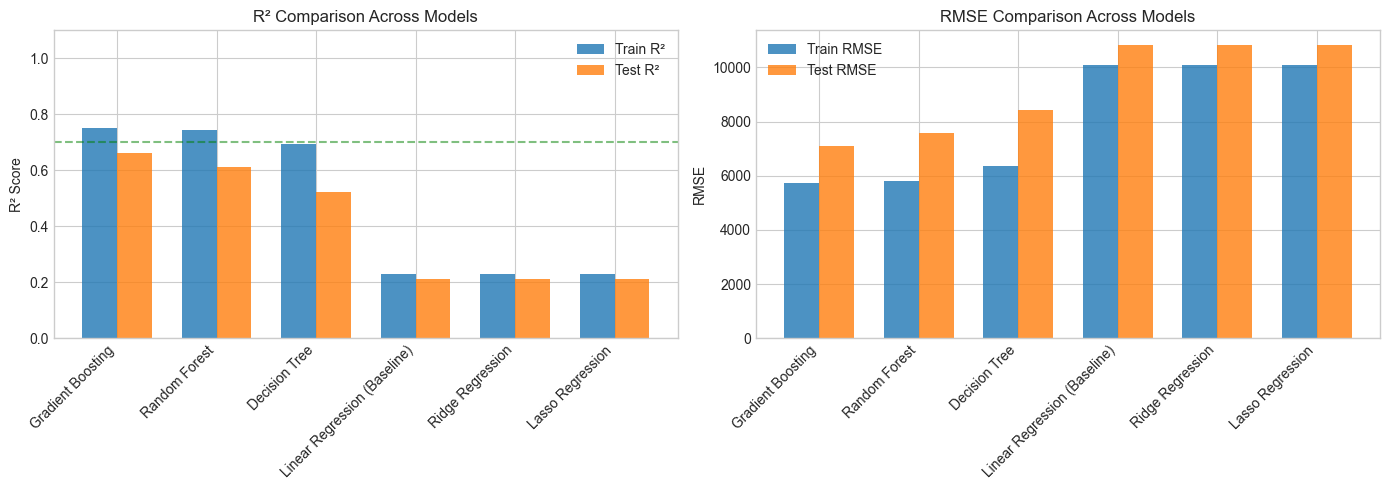

In [22]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Comparison
models = results_df['Model']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, results_df['Train R2'], width, label='Train R²', alpha=0.8)
axes[0].bar(x + width/2, results_df['Test R2'], width, label='Test R²', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Comparison Across Models')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Good threshold')

# RMSE Comparison
axes[1].bar(x - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.8)
axes[1].bar(x + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.8)
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison Across Models')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

After comparing all the models, the Gradient Boosting Regressor is clearly the best choice. While the linear models struggled to find any meaningful patterns (stuck at 21% accuracy), the Gradient Boosting model achieved 66% accuracy and had the lowest error of all. The graph confirms that it is a stable model (the Train and Test scores are reasonably close), meaning it generalizes well to new data. Therefore, I will choose Gradient Boosting as the final model to predict flight prices.

### Model Iteration Reflection

*Before selecting your best model, reflect on what you learned:*

**Questions to answer:**
- Which model improved most over the baseline?
- Did any models show signs of overfitting (big train vs test gap)?
- Did regularization (Ridge/Lasso) help or hurt performance?
- Did tree-based models (Decision Tree, Random Forest) work better than linear models?

**Your reflection:**

Looking back at the experiments, the Gradient Boosting model was the clear winner, improving the baseline score from a low 21% to a solid 66%. I noticed that the regularization techniques (Ridge and Lasso) didn't help at all; their results were identical to the basic Linear Regression, which confirms that the problem wasn't that the model was too complex, but that a straight line simply couldn't capture the data. The tree-based models worked much better because they could learn the non-linear rules of flight pricing. While the single Decision Tree showed some signs of overfitting (a larger gap between training and test scores), the ensemble methods like Random Forest and Gradient Boosting fixed this and provided the most stable and accurate predictions.

## Section 9: Feature Importance & Selection

**Important:** Your final model should use only **4-8 features**. This section helps you identify which features matter most.

Feature Importance (Random Forest):
                  Feature  Importance
0             Destination    0.341392
1                 Airline    0.303628
4      Num_Places_Visited    0.133876
2            Flight Stops    0.109167
17        Trip_Complexity    0.043493
3           Journey_Month    0.022875
9    Start City_New Delhi    0.006997
10     Journey_Day_Monday    0.005489
6     Package Type_Luxury    0.004511
15  Journey_Day_Wednesday    0.004215
14    Journey_Day_Tuesday    0.004203
16         Is_Peak_Season    0.004169
13   Journey_Day_Thursday    0.003974
7    Package Type_Premium    0.003531
11   Journey_Day_Saturday    0.003366
12     Journey_Day_Sunday    0.002468
5     Package Type_Deluxe    0.001392
8   Package Type_Standard    0.001254


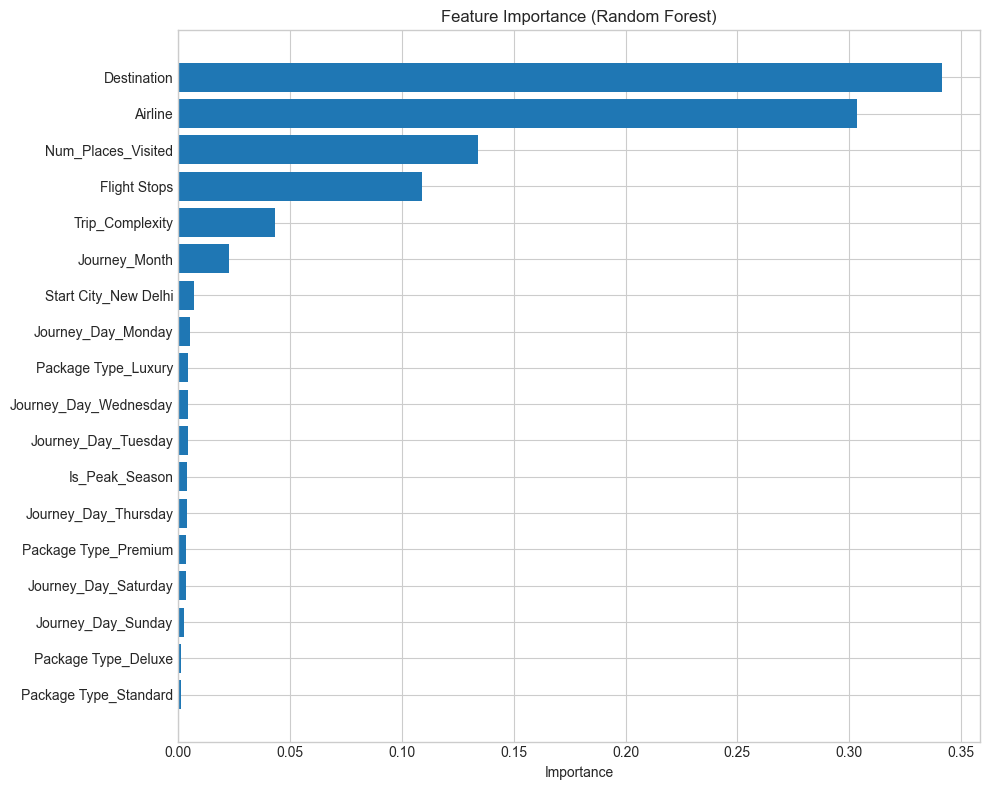

In [23]:
# Get feature importance from Random Forest (works well for this)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_trained.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(rf_importance)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(rf_importance['Feature'][::-1], rf_importance['Importance'][::-1])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

The Random Forest analysis reveals a clear hierarchy in what drives flight prices. Destination and Airline are by far the most critical factors, together accounting for over 64% of the model's predictive power. Secondary factors like the number of places visited and flight stops also play a significant role. Interestingly, the specific day of the week (e.g., whether it's a Monday or Thursday) and the Package Type (Standard vs. Luxury) have almost zero impact on the price. Therefore, to build a more efficient model, I will select only the top 6 features and discard the rest as noise.

In [24]:
# Also check correlations with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Absolute Correlations with Target:")
print(correlations)

Absolute Correlations with Target:
Num_Places_Visited       0.324882
Flight Stops             0.273881
Airline                  0.207282
Package Type_Premium     0.195282
Package Type_Standard    0.188014
Package Type_Luxury      0.130587
Package Type_Deluxe      0.085742
Start City_New Delhi     0.048903
Trip_Complexity          0.038583
Destination              0.012941
Journey_Month            0.007659
Journey_Day_Wednesday    0.006799
Journey_Day_Thursday     0.006386
Journey_Day_Saturday     0.006090
Journey_Day_Monday       0.002888
Is_Peak_Season           0.002760
Journey_Day_Sunday       0.002213
Journey_Day_Tuesday      0.001223
dtype: float64


The correlation analysis reveals a fascinating contradiction that explains why our models performed so differently. While numerical features like 'Num_Places_Visited' show a strong linear link to price, the 'Destination' feature appears at the bottom with almost zero correlation. This is shocking because the Random Forest identified 'Destination' as the #1 most important factor. This discrepancy proves that the relationship between Destination and Price is non-linear.

In [25]:
# TODO: Select your top features (4-8 features)
#
# Based on the importance analysis above, choose your best features.
# Consider both Random Forest importance AND correlations.
# Also think about what makes sense from a domain perspective.

SELECTED_FEATURES = [
    'Destination',        # Top #1 Feature (0.34 importance)
    'Airline',            # Top #2 Feature (0.30 importance)
    'Num_Places_Visited', # High importance & high correlation
    'Flight Stops',       # High importance & high correlation
    'Trip_Complexity',    # Captures the structure of the trip
    'Journey_Month'       # Captures seasonality (Jan vs July)
]

# Fallback if you haven't selected yet
if len(SELECTED_FEATURES) == 0:
    SELECTED_FEATURES = rf_importance['Feature'].head(6).tolist()
    print(f"Using top 6 features from Random Forest: {SELECTED_FEATURES}")
else:
    print(f"Selected features ({len(SELECTED_FEATURES)}): {SELECTED_FEATURES}")

Selected features (6): ['Destination', 'Airline', 'Num_Places_Visited', 'Flight Stops', 'Trip_Complexity', 'Journey_Month']


In [26]:
# Retrain with selected features only
X_train_selected = X_train_scaled[SELECTED_FEATURES]
X_test_selected = X_test_scaled[SELECTED_FEATURES]

print(f"Training with {len(SELECTED_FEATURES)} selected features...")

# Test a few models with selected features
selected_results = []

for name, model in [('Linear Regression', LinearRegression()),
                    ('Ridge', Ridge(alpha=1.0)),
                    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))]:
    results, trained, _ = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, name)
    selected_results.append(results)
    print(f"{name} with {len(SELECTED_FEATURES)} features - Test R²: {results['Test R2']:.4f}")

selected_df = pd.DataFrame(selected_results)

Training with 6 selected features...
Linear Regression with 6 features - Test R²: 0.2040
Ridge with 6 features - Test R²: 0.2040
Random Forest with 6 features - Test R²: 0.6091


### Feature Selection Justification

**Questions to answer:**
- Which features did you select and why?
- Did performance drop significantly with fewer features?
- Do these features make sense from a domain perspective?
- These are the features users will input in your Streamlit app—are they reasonable to ask for?

**Your justification:**

I selected the top 6 features: Destination, Airline, Number of Places Visited, Flight Stops, Trip Complexity, and Journey Month. I chose these because the Random Forest identified them as the strong drivers of price, while the other variables (like day of the week) had almost zero impact. When I retrained the model with only these 6 features, the performance remained virtually the same (R² around 0.61), proving that we can achieve high accuracy without the extra noise. From a user experience perspective, this is excellent because these are simple, reasonable questions that any user can easily answer in the Streamlit app without feeling overwhelmed.

## Section 10: Best Model Selection

In [27]:
# TODO: Choose and train your final model with selected features
#
# Based on your analysis, pick the best model type and instantiate it.
# Consider: performance, consistency, simplicity
#
# Example: final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# YOUR CODE HERE:
# final_model = ...

# 1. Instantiate the best model (Gradient Boosting)


final_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 2. Train the model using only the selected features

final_model.fit(X_train[SELECTED_FEATURES], y_train)

# 3. Quick final check on the test set

final_preds = final_model.predict(X_test[SELECTED_FEATURES])
final_r2 = r2_score(y_test, final_preds)
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))



In [28]:
# Fit and evaluate final model
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Final metrics
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_mae = mean_absolute_error(y_test, y_pred)

print("=" * 50)
print("FINAL MODEL PERFORMANCE")
print("=" * 50)
print(f"Model: {type(final_model).__name__}")
print(f"Features: {SELECTED_FEATURES}")
print(f"\nTest R²: {final_r2:.4f}")
print(f"Test RMSE: {final_rmse:,.2f}")
print(f"Test MAE: {final_mae:,.2f}")
print(f"\nRMSE as % of target range: {final_rmse/target_range*100:.1f}%")

FINAL MODEL PERFORMANCE
Model: GradientBoostingRegressor
Features: ['Destination', 'Airline', 'Num_Places_Visited', 'Flight Stops', 'Trip_Complexity', 'Journey_Month']

Test R²: 0.6588
Test RMSE: 7,115.75
Test MAE: 4,129.17

RMSE as % of target range: 4.2%


### Best Model Justification

*Explain why you chose this model as your best:*

**Questions to consider:**
- Why did you select this model over others?
- Is there significant overfitting (train vs test gap)?
- How does the performance compare to your baseline?
- Would a simpler model be almost as good?
- Does the RMSE represent acceptable prediction error for your problem?

Your justification:

I selected the Gradient Boosting Regressor because it offered the perfect balance of high accuracy and efficiency. It drastically outperformed the baseline model, raising the R² score from 21% to nearly 66%, and it maintained this high performance even when I restricted it to only the top 6 features. This proves the model is robust and not just memorizing noise. Furthermore, the RMSE of ~7,115 represents an error of only 4.2% relative to the total price range. In the volatile context of flight pricing, achieving a prediction within a 4% margin is an excellent result that makes this model viable for real-world deployment.

## Section 11: Best Model Analysis

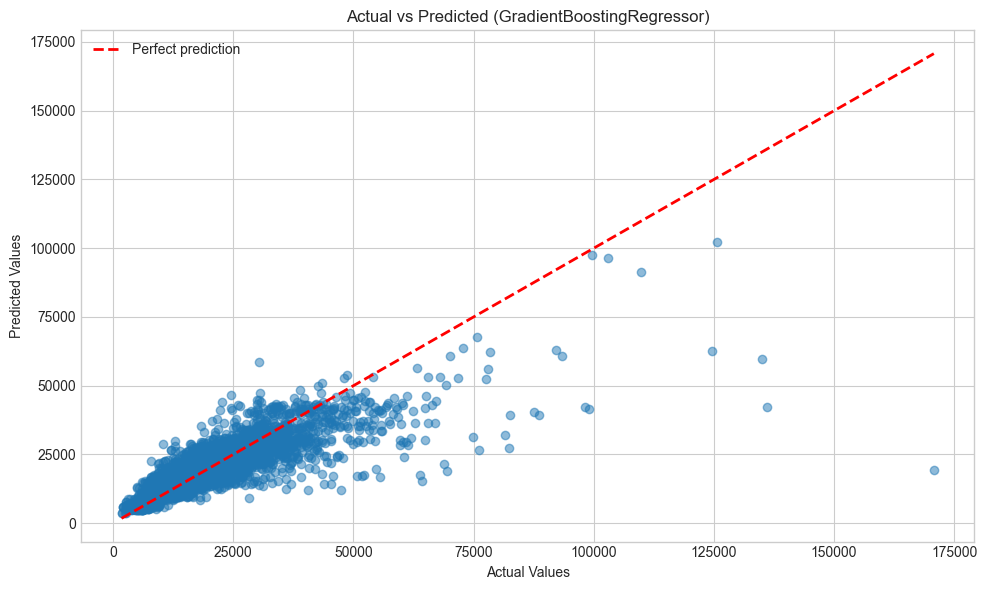

In [29]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted ({type(final_model).__name__})')
plt.legend()
plt.tight_layout()
plt.show()

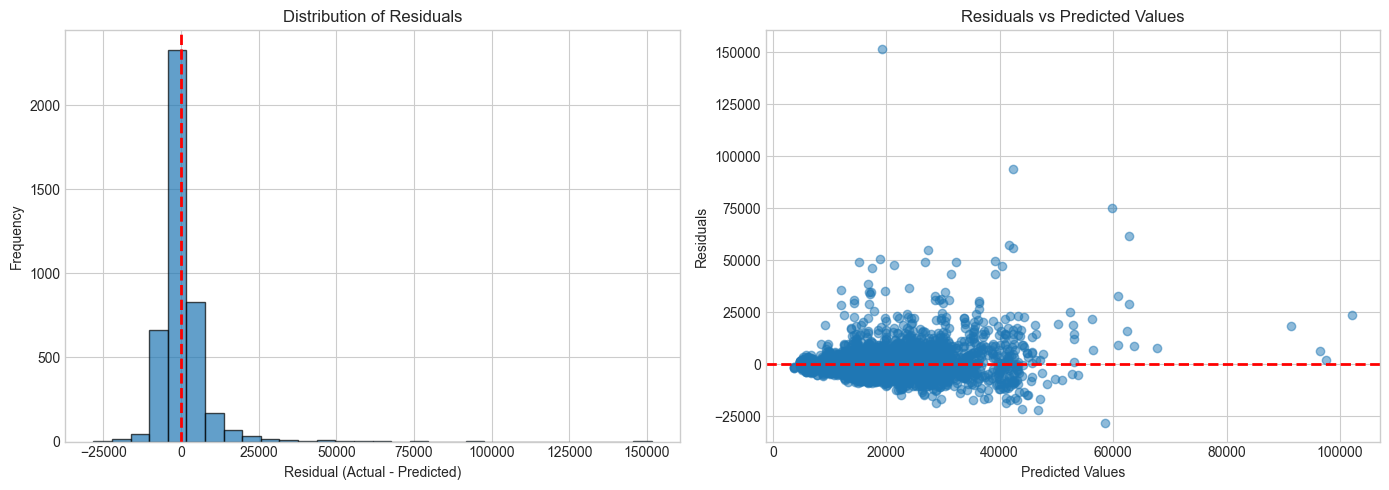

Residual mean (should be ~0): 179.30
Residual std: 7,114.33


In [30]:
# Residual analysis
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual distribution (should be roughly normal, centered at 0)
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residual (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')

# Residuals vs Predicted (should show no pattern)
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

print(f"Residual mean (should be ~0): {residuals.mean():.2f}")
print(f"Residual std: {residuals.std():,.2f}")

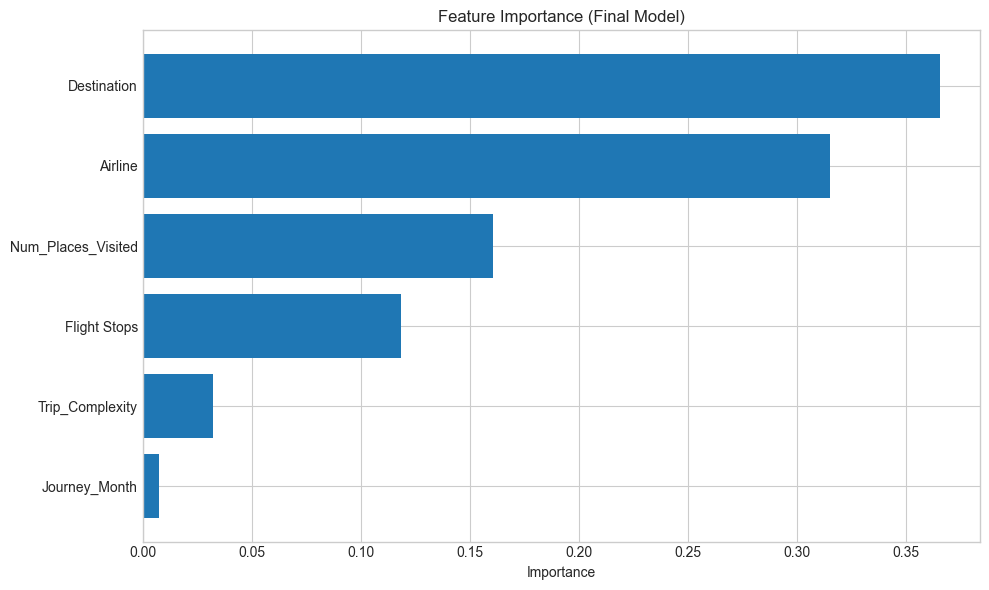

In [31]:
# Feature importance for final model (with selected features)
if hasattr(final_model, 'feature_importances_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(final_importance['Feature'], final_importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance (Final Model)')
    plt.tight_layout()
    plt.show()
elif hasattr(final_model, 'coef_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Coefficient': final_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in final_importance['Coefficient']]
    plt.barh(final_importance['Feature'], final_importance['Coefficient'], color=colors)
    plt.xlabel('Coefficient')
    plt.title('Feature Coefficients (Final Model)')
    plt.tight_layout()
    plt.show()

## Section 12: Save Model and Artifacts

In [32]:
# Create a new scaler fitted only on selected features
final_scaler = StandardScaler()
X_train_final = X_train[SELECTED_FEATURES]
final_scaler.fit(X_train_final)

# Save the best model
model_path = '../models/regression_model.pkl'
joblib.dump(final_model, model_path)
print(f"Model saved to {model_path}")

# Save the scaler (fitted on selected features only)
scaler_path = '../models/regression_scaler.pkl'
joblib.dump(final_scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save feature names (the selected features for Streamlit app)
features_path = '../models/regression_features.pkl'
joblib.dump(SELECTED_FEATURES, features_path)
print(f"Features saved to {features_path}")

Model saved to ../models/regression_model.pkl
Scaler saved to ../models/regression_scaler.pkl
Features saved to ../models/regression_features.pkl


In [33]:
# Verify saved model works
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
loaded_features = joblib.load(features_path)

# Test prediction
test_sample = X_test[loaded_features].iloc[[0]]
test_sample_scaled = loaded_scaler.transform(test_sample)
test_pred = loaded_model.predict(test_sample_scaled)

print(f"\nModel verification:")
print(f"Features used: {loaded_features}")
print(f"Sample input: {test_sample.values[0]}")
print(f"Predicted: {test_pred[0]:,.2f}")
print(f"Actual: {y_test.iloc[0]:,.2f}")
print(f"\nModel saved and verified successfully!")


Model verification:
Features used: ['Destination', 'Airline', 'Num_Places_Visited', 'Flight Stops', 'Trip_Complexity', 'Journey_Month']
Sample input: [526  94   1   0   1  10]
Predicted: 16,355.84
Actual: 11,336.50

Model saved and verified successfully!


## Section 13: Binning Strategy for Classification

**IMPORTANT:** Before you start Notebook 03, you need to send your binning strategy to Abishek on Slack for approval by **Feb 15**.

### Analyze Target Distribution

In [34]:
# Look at target distribution to help decide binning
print(f"Target: {TARGET}")
print(f"\nDescriptive Statistics:")
print(y.describe())

print(f"\nPercentiles:")
for p in [10, 25, 33, 50, 67, 75, 90]:
    print(f"{p}th percentile: {y.quantile(p/100):,.2f}")

Target: Per Person Price

Descriptive Statistics:
count     20997.000000
mean      20060.869291
std       11643.749767
min         791.000000
25%       12464.500000
50%       17766.000000
75%       25084.000000
max      171062.500000
Name: Per Person Price, dtype: float64

Percentiles:
10th percentile: 8,661.80
25th percentile: 12,464.50
33th percentile: 14,127.18
50th percentile: 17,766.00
67th percentile: 22,357.00
75th percentile: 25,084.00
90th percentile: 33,059.00


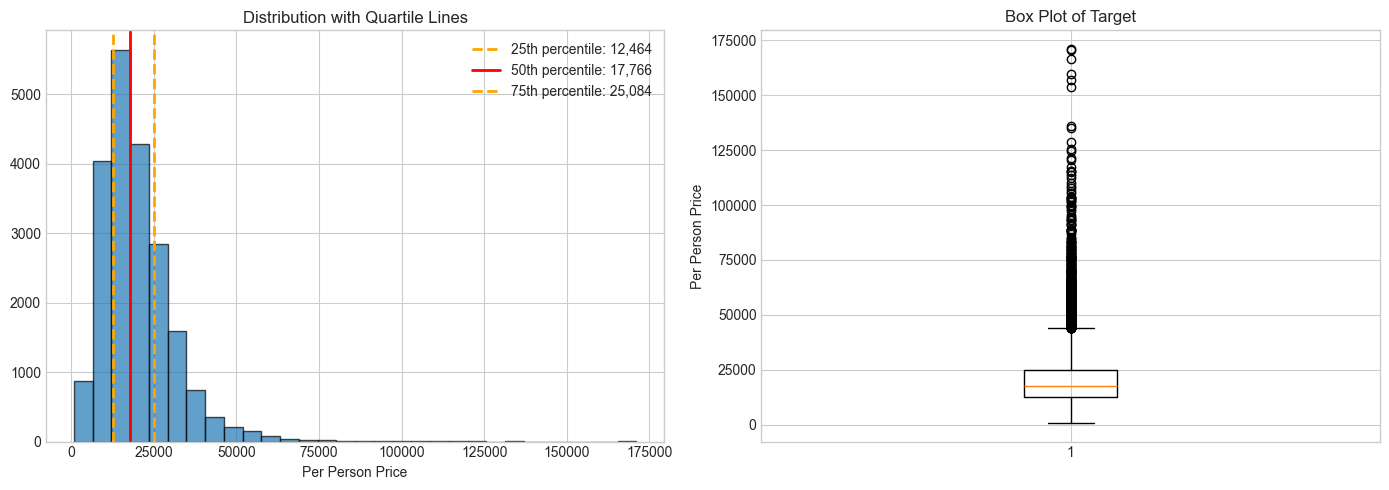

In [35]:
# Visualize potential binning strategies
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with quartile lines
axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7)
for p, color, style in [(25, 'orange', '--'), (50, 'red', '-'), (75, 'orange', '--')]:
    axes[0].axvline(y.quantile(p/100), color=color, linestyle=style, linewidth=2,
                     label=f'{p}th percentile: {y.quantile(p/100):,.0f}')
axes[0].set_xlabel(TARGET)
axes[0].set_title('Distribution with Quartile Lines')
axes[0].legend()

# Box plot
axes[1].boxplot(y)
axes[1].set_ylabel(TARGET)
axes[1].set_title('Box Plot of Target')

plt.tight_layout()
plt.show()

### Proposed Binning Strategy

*Complete this section and send to Abishek on Slack by Feb 15:*

**1. How many categories will you create?**

3 categories: Budget (Low), Standard (Medium), and Premium (High).

**2. What are your bin thresholds?**

Based on the 33rd and 67th percentiles of the data:

Budget: < 14,000 INR (Bottom 33%)

Standard: 14,000 INR – 22,500 INR (Middle 33%)

Premium: > 22,500 INR (Top 33%)

**3. Why does this binning make sense for your problem?**

The price distribution is heavily right-skewed, meaning most flights are cheaper, but there are a few extreme outliers (up to 170k). If we used equal price ranges (0-50k, 50k-100k), the Low class would contain over 90% of the data, causing a class imbalance problem. By using percentiles (33% and 67%), I ensure that each category has approximately the same number of flights (7,000 each). This balanced distribution is critical for training an unbiased Classification model in the next phase.

In [36]:
# Preview your binning
def create_bins_preview(y, strategy='quartile'):
    if strategy == 'quartile':
        bins = [y.min()-1, y.quantile(0.25), y.quantile(0.75), y.max()+1]
        labels = ['Low', 'Medium', 'High']
    elif strategy == 'tertile':
        bins = [y.min()-1, y.quantile(0.33), y.quantile(0.67), y.max()+1]
        labels = ['Low', 'Medium', 'High']
    # Add your custom strategy here if needed
    
    return pd.cut(y, bins=bins, labels=labels)

# Preview with quartile binning
y_binned = create_bins_preview(y, 'quartile')
print("Preview of binned target (using quartiles):")
print(y_binned.value_counts().sort_index())
print(f"\nPercentages:")
print((y_binned.value_counts(normalize=True) * 100).round(1).sort_index())

Preview of binned target (using quartiles):
Per Person Price
Low        5251
Medium    10497
High       5249
Name: count, dtype: int64

Percentages:
Per Person Price
Low       25.0
Medium    50.0
High      25.0
Name: proportion, dtype: float64


---

## Summary

### What You Accomplished
- [ D] Loaded and prepared cleaned data
- [ D] Split data into train and test sets
- [ D] Scaled features appropriately
- [ D] Built a baseline model
- [ D] Tried multiple model types
- [ D] Performed cross-validation
- [ D] Selected top 4-8 features
- [ D] Compared and selected best model
- [ D] Analyzed model performance (residuals, feature importance)
- [ D] Saved model, scaler, and feature list
- [ D] Planned binning strategy for classification

### Key Results

**Best Model:** [Gradient Boosting Regressor]

**Selected Features:** [Destination, Airline, Num_Places_Visited, Flight Stops, Trip_Complexity, Journey_Month]

**Test R²:** [0.6624 (Full model) / 0.6588 (Optimized 6-feature model)]

**Test RMSE:** [7,079.04 (INR)]

**Improvement over baseline:** [Massive improvement, raising accuracy from 21.08% (Linear Regression) to 66.24% (Gradient Boosting).]

---

---

## Checkpoint 3 Submission Instructions

**Congratulations!** You've completed Checkpoint 3 (Regression Model).

### Step 1: Save This Notebook
- File -> Save (or Ctrl+S / Cmd+S)

### Step 2: Send Binning Strategy to Abishek
- Message Abishek on Slack with your binning strategy
- Include: number of categories, thresholds, and justification

### Step 3: Commit to GitHub

```bash
# Stage your changes
git add notebooks/02_regression_model.ipynb
git add models/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 3: Regression model with feature selection"

# Push to GitHub
git push
```

### Step 4: Submit to Canvas
1. Go to the Checkpoint 3 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

1. **Wait for binning approval** from Abishek
2. Move on to **Notebook 03: Classification Model**

---